## Telecome Churn Customer Data


A fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

Data Description 

    CustomerID: A unique ID that identifies each customer.
    Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
    Country: The country of the customer’s primary residence.
    State: The state of the customer’s primary residence.
    City: The city of the customer’s primary residence.
    Zip Code: The zip code of the customer’s primary residence.
    Lat Long: The combined latitude and longitude of the customer’s primary residence.
    Latitude: The latitude of the customer’s primary residence.
    Longitude: The longitude of the customer’s primary residence.
    Gender: The customer’s gender 
    Senior Citizen: Indicates if the customer is 65 or older 
    Partner: Indicate if the customer has a partner 
    Dependents: Indicates if the customer lives with any dependents    
    Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
    
    Phone Service: Indicates if the customer subscribes to home phone service with the company 
    Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company 
    Internet Service: Indicates if the customer subscribes to Internet service with the company 
    Online Security: Indicates if the customer subscribes to an additional online security service provided by the company 
    Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company 
    Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company 
    
    Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times 
    
    Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider 
    
    Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider 
    Contract: Indicates the customer’s current contract type 
    Paperless Billing: Indicates if the customer has chosen paperless billing 
    Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
    Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
    Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
    Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
    
    Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
    
    Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
    
    CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
    
    Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

### Loading dataset into dataframe

In [834]:
df_churn=pd.read_csv('F://somya//python_code//chrun.csv')

### Dimension of the dataframe

In [835]:
df_churn.shape #checking no of observations and columns

(7043, 33)

In [836]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [837]:
df_churn.head() # checking top 5 observations of dataset 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,33.964131; -118.272783,33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,34.059281; -118.30742,34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,34.048013; -118.293953,34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,34.062125; -118.315709,34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,34.039224; -118.266293,34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [838]:
df_churn.tail() # checking last 5 observations of dataset 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,34.341737; -116.539416,34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,34.667815; -117.536183,34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,34.559882; -115.637164,34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,34.1678; -116.86433,34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,34.424926; -117.184503,34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


##### Columns & DataTypes

In [839]:
#renaming all the column which have space in their name
for column in df_churn:
    df_churn.rename(columns={column:column.replace(' ','_')},inplace=True)

#####  Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

In [840]:
df_churn.info() # checking new names of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

In [841]:
#converting all object type variables into categoircal
for column in df_churn:
    if df_churn[column].dtype=='object':
        df_churn=df_churn.astype({column:'category'}) 

In [842]:
#Checking datatype after converting
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   category
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   category
 3   State              7043 non-null   category
 4   City               7043 non-null   category
 5   Zip_Code           7043 non-null   int64   
 6   Lat_Long           7043 non-null   category
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior_Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure_Months      7043 non-null   int64   
 14  Phone_Service      7043 non-null   category
 15  Multiple_Lines     7043 non-null   category
 16  Intern

##### Statical Datatype
    CustomerID : nominal
    Country : nominal
    State : nominal
    City : nominal
    Zip Code : nominal
    Latitude : Continous
    Longitude : Continous
    Gender : nominal
    Senior Citizen : nominal
    Partner : nominal
    Dependents : nominal
    Tenure Months : Discrete
    Phone Service : nominal
    Multiple Lines : nominal
    Internet Service : nominal
    Online Security : nominal
    Online Backup : nominal
    Device Protection : nominal
    Tech Support : nominal
    Streaming TV : nominal
    Streaming Movies : nominal
    Contract : nominal
    Paperless Billing : nominal
    Payment Method : nominal
    Monthly Charges : Continous
    Total Charges : Continous
    Churn Label : nominal
    Churn Value : nominal
    Churn Score : Discrete
    CLTV : Discrete
    Churn Reason : nominal

In [843]:
# converting both fields into category because both are nominal type data
df_churn=df_churn.astype({'Zip_Code':'category'}) 


In [844]:
df_churn.info() #checking again the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   category
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   category
 3   State              7043 non-null   category
 4   City               7043 non-null   category
 5   Zip_Code           7043 non-null   category
 6   Lat_Long           7043 non-null   category
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior_Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure_Months      7043 non-null   int64   
 14  Phone_Service      7043 non-null   category
 15  Multiple_Lines     7043 non-null   category
 16  Intern

##### Q2: Please apply appropriate statistical measures using python based on data types.

##### Data Summary

In [845]:
df_churn.describe(include='all') # all   columns 5 point summary

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
count,7043,7043.0,7043,7043,7043,7043.0,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043.000000,7043,7043,7043.0,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,1652.0,1652,NaN,NaN,2,...,3,2,4,NaN,6531,2,2.0,NaN,NaN,20
top,0002-ORFBO,NaN,United States,California,Los Angeles,90001.0,32.555828; -117.040073,NaN,NaN,Male,...,Month-to-month,Yes,Electronic check,NaN,,No,0.0,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,5.0,5,NaN,NaN,3555,...,3875,4171,2365,NaN,11,5174,5174.0,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,NaN,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,75.000000,5380.500000,NaN


##### Erroneous value fix

In [846]:
# 'Total Charges' is reading as object so there must be some erroneous value
# checked and found blank values so replacing those blank values into 0
df_churn['Total_Charges']=df_churn['Total_Charges'].replace(' ', np.nan) 
df_churn['Total_Charges']=df_churn['Total_Charges'].astype('float') 
df_churn.Total_Charges=df_churn.Total_Charges.fillna(df_churn['Total_Charges'].mean()) 

In [847]:
#count column and Lat Long column doesn't have any specific meaning so its better to drop them
# customer Id is unique for each column and country and state have only one value which is static so we can drop them
df_churn=df_churn.drop(columns=['Count'])
df_churn=df_churn.drop(columns=['Lat_Long'])
df_churn=df_churn.drop(columns=['CustomerID'])
df_churn=df_churn.drop(columns=['Country'])
df_churn=df_churn.drop(columns=['State'])

In [849]:
#after droping the columns dimensions of the dataset is change
df_churn.shape

(7043, 28)

##### Missing Values

<AxesSubplot:>

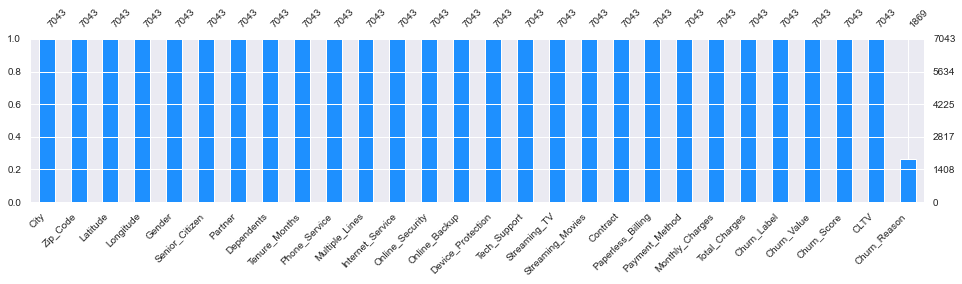

In [850]:
msno.bar(df_churn, figsize=(16,3), fontsize=10, color="dodgerblue")

Infrence: Above ploy shwing the chrun_reason having null values

In [851]:
df_churn.Churn_Reason.isnull().sum()
# 5174 out of 7043 population are missing

5174

In [852]:
df_churn.Churn_Reason.isnull().mean()*100
# 73.4% values from cilumns are missing.

73.4630129206304

Infrence: 73% data is missing so its better to drop the column.

In [853]:
#dividing data set on the basis of churn value, because  Churn_Reason directly related to churn value
df_churn_value_0=df_churn[df_churn['Churn_Value']==0]
df_churn_value_1=df_churn[df_churn['Churn_Value']==1]

In [854]:
df_churn_value_0.describe(include='category') 

,City,Zip_Code,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Churn_Label,Churn_Value,Churn_Reason
count,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5174,5174,0
unique,1117,1636,2,2,2,2,2,3,3,3,...,3,3,3,3,3,2,4,1,1,0
top,Los Angeles,91320,Male,No,Yes,No,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,No,0,NaN
freq,215,5,2625,4508,2733,3653,4662,2541,1962,2037,...,1884,2027,1893,1914,2220,2771,1304,5174,5174,NaN


In [855]:
df_churn_value_1.describe(include='category') 

,City,Zip_Code,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Churn_Label,Churn_Value,Churn_Reason
count,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869
unique,833,1190,2,2,2,2,2,3,3,3,...,3,3,3,3,3,2,4,1,1,20
top,Los Angeles,90020,Female,No,No,No,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,Attitude of support person
freq,90,5,939,1393,1200,1763,1699,850,1297,1461,...,1211,1446,942,938,1655,1400,1071,1869,1869,192


Infrence: 

    On the basis of churn value we can say that churn_reason directly related to churn value.
    So i am going to replace values for churn reason column with no.
            

In [856]:
#converting column into object and filling null values with no after that converting column again into category
df_churn=df_churn.astype({'Churn_Reason':'object'})
df_churn.Churn_Reason=df_churn.Churn_Reason.fillna('no')
df_churn=df_churn.astype({'Churn_Reason':'category'})


In [857]:
#checking null values for the churn_reason 
df_churn.Churn_Reason.isnull().sum()

0

##### Skewed data

In [858]:
df_churn.skew(numeric_only=True).sort_values()

CLTV              -0.311602
Monthly_Charges   -0.220524
Churn_Score       -0.089840
Longitude         -0.040792
Tenure_Months      0.239540
Latitude           0.303867
Total_Charges      0.962394
dtype: float64

<AxesSubplot:>

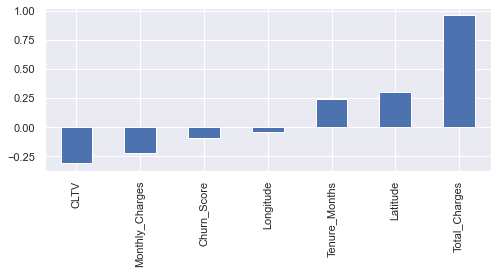

In [859]:
df_churn.skew(numeric_only=True).sort_values().plot(kind='bar',figsize=(8,3))
#skewness in bar plot

 Infrence:
 
    fairly symmetrical	-0.5 & 0.5	            
    moderately skewed	-1.0 & -0.5 or 0.5 & 1	 
    highly skewed    	> -1 0r > 1	            
    
    data is moderately skewed only for Total_Charges all other columns are fairly symmetrical

In [860]:
df_churn.Total_Charges.describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: Total_Charges, dtype: float64

Infrence: 

        75% data is less than 4000 so means 25% data is having skewed 


### Univariant analysis

##### Distribution of numerical and categorical variables

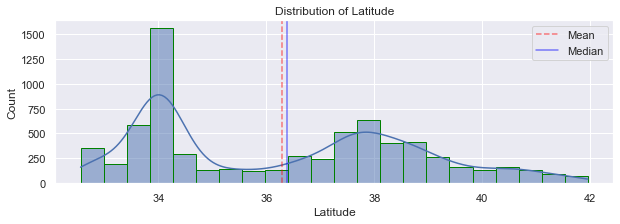

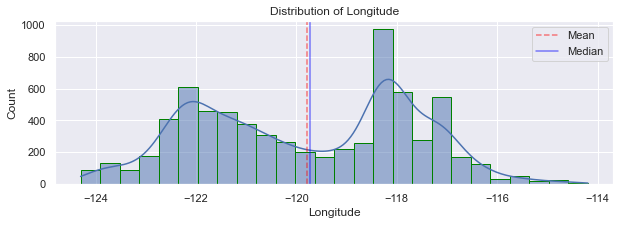

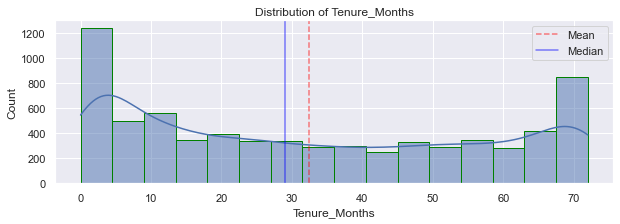

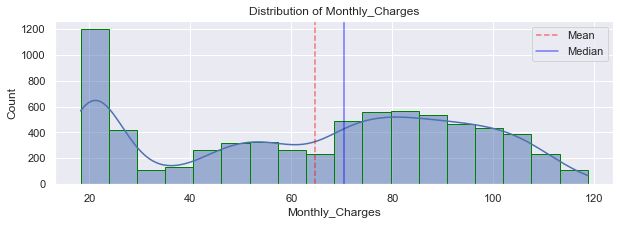

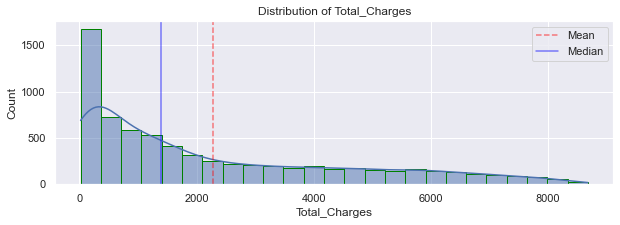

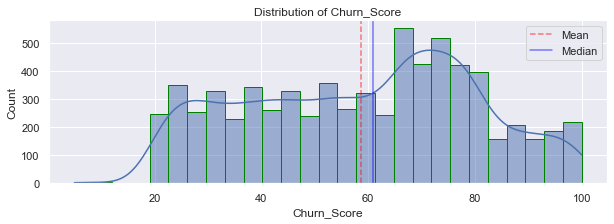

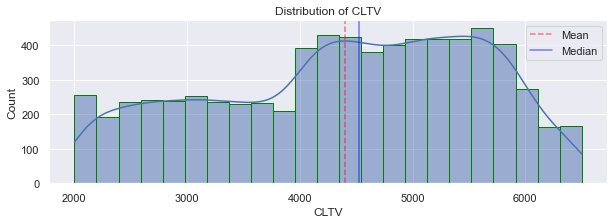

In [861]:
num=df_churn.select_dtypes(include='number').columns

for column in num:
    sns.histplot(x=df_churn[column],kde=True, color='b', edgecolor='green',)
    plt.axvline(x=df_churn[column].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=df_churn[column].median(),color='blue',alpha=0.5,label='Median') 
    plt.xlabel( column, fontsize=12)
    plt.ylabel('Count', fontsize=12)     
    plt.title(f'Distribution of {column}', fontsize=12) 
    plt.legend()
    plt.show()

 CustomerID is unique for each entry, and for country and state both column is having single entity so it doesn't need to check distribution.
 

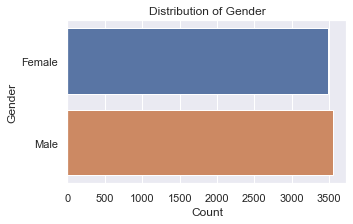

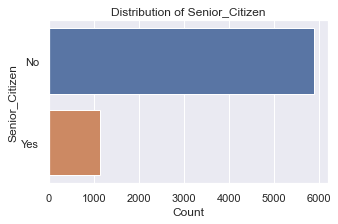

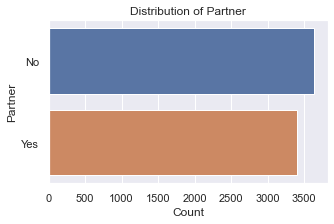

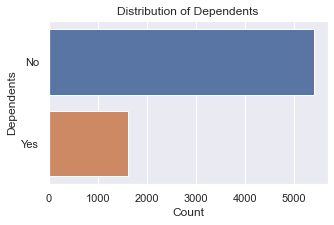

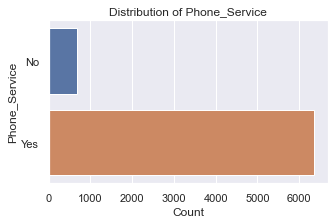

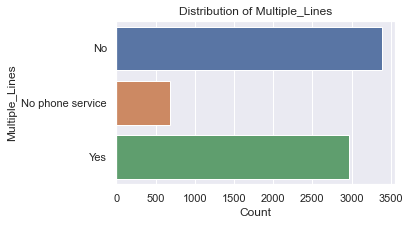

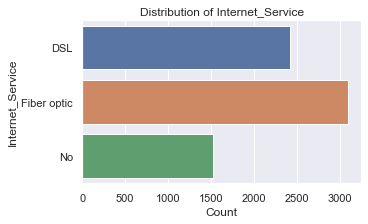

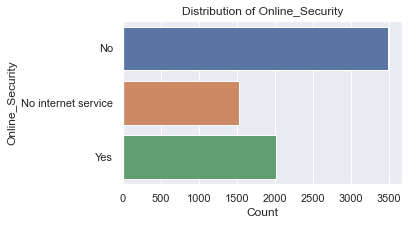

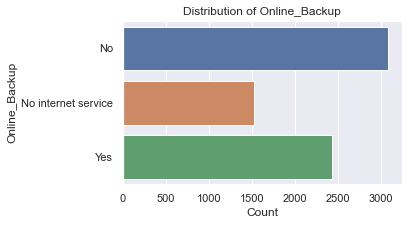

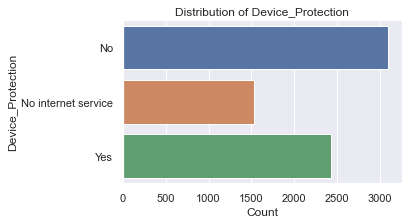

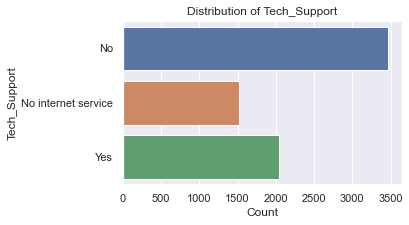

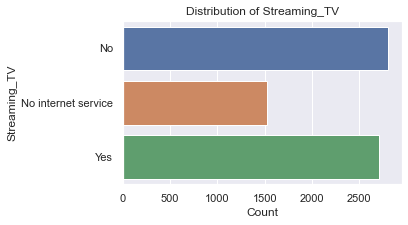

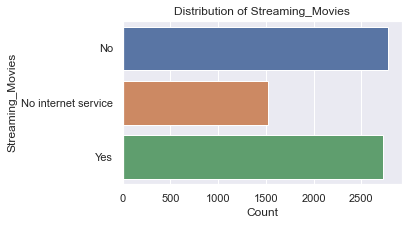

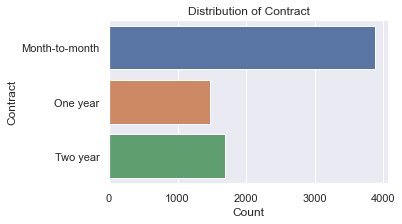

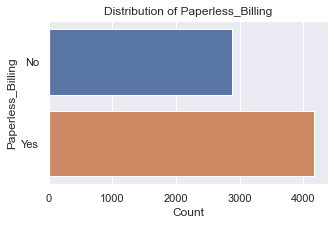

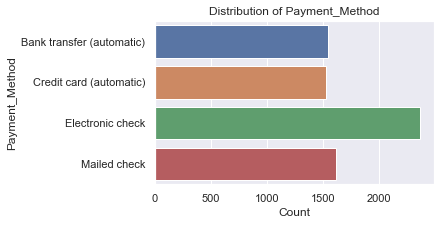

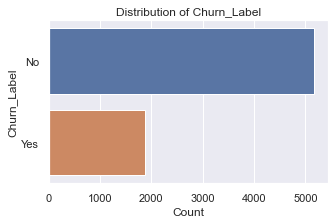

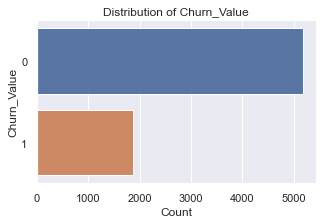

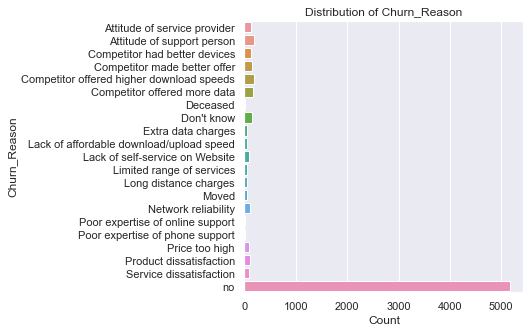

In [862]:
col=df_churn.select_dtypes(include='category').columns

for column in col:  
    if    column!='Zip_Code' and  column!='City': 
        if column=='Churn_Reason' :
            plt.figure(figsize = (5,5))   
        else:
            plt.figure(figsize = (5,3))  
        sns.countplot(y =column , data = df_churn)  
        plt.xlabel('Count',fontsize=12)
        plt.ylabel(column,fontsize=12)
        plt.title(f'Distribution of {column}',fontsize=12)
        plt.show()

#### Q. What is the percentage of females and senior citizens in this data set? 

In [871]:
def dist_Cat(column,fW,fL):
    total = float(len(df_churn))
    plt.figure(figsize=(fW,fL))
    ax=sns.countplot(x=column, data=df_churn)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12) 
    plt.title(f'Distribution of {column}',fontsize=13)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

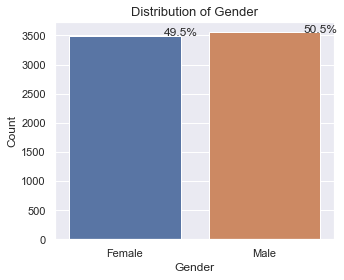

In [872]:
dist_Cat('Gender',5,4)

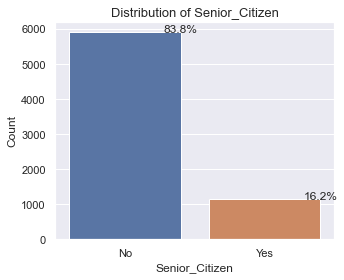

In [873]:
dist_Cat('Senior_Citizen',5,4)

 Infrence:  
            
            Females are 49% population of the total population
            Senior Citizens are 16.2% population of the total population

##### Q. Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked?

In [874]:
df_churn['Tenure_Months'].skew() 
# The Tenure_Months is symmetric

0.2395397495619829

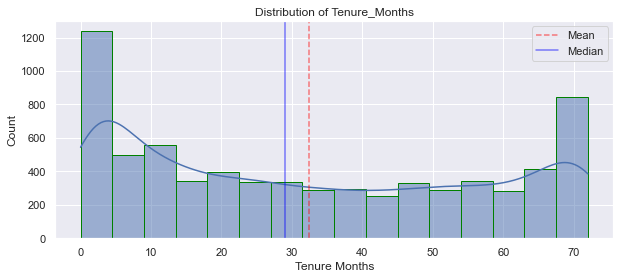

In [877]:
plt.figure(figsize=(10,4)) 
sns.histplot(x=df_churn['Tenure_Months'],kde=True, color='b', edgecolor='green',)
plt.axvline(x=df_churn['Tenure_Months'].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
plt.axvline(x=df_churn['Tenure_Months'].median(),color='blue',alpha=0.5,label='Median') 
plt.xlabel( 'Tenure Months', fontsize=12)
plt.ylabel('Count', fontsize=12)     
plt.title(f'Distribution of Tenure_Months', fontsize=12) 
plt.legend()
plt.show()

Infrence: The distribution is evenly

##### Q5. Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [880]:
for col in df_churn.columns:
    if df_churn[col].nunique()==2:
        if all(df_churn[col].unique()) == True:
            if col=='Gender':
                df_churn['Gender']=df_churn['Gender'].map({"Female" : 0, "Male": 1})
            else :
                df_churn[col]=df_churn[col].map({"No" : 0, "Yes": 1})
                
            print('Column :',col ,' Values after conversion ',df_churn_binary_col[col].unique())

Column : Gender  Values after conversion  [1 0]
Column : Senior_Citizen  Values after conversion  [0 1]
Column : Partner  Values after conversion  [0 1]
Column : Dependents  Values after conversion  [0 1]
Column : Phone_Service  Values after conversion  [1 0]
Column : Paperless_Billing  Values after conversion  [1 0]
Column : Churn_Label  Values after conversion  [1 0]


##### Q6. Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

In [881]:
df_churn['Gender']=df_churn['Gender'].map({0:"Female",1: "Male"})  # "Female" : 0, "Male": 1

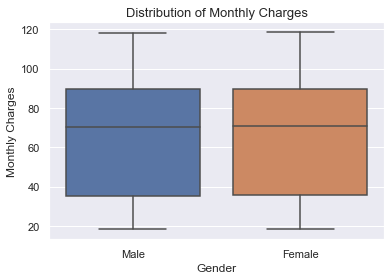

In [883]:
plt.figure(figsize=(6,4)) 
sns.boxplot(x="Gender", y="Monthly_Charges", data=df_churn, order=["Male", "Female"])
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Monthly Charges',fontsize=12)
plt.title('Distribution of Monthly Charges',fontsize=13)
plt.show()

Infrence

        Monthly charges is equally distributed for the male and female.
        And there is no outliners.
        

##### Q7. Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [899]:
df_churn_LA=df_churn[df_churn['City']=='Los Angeles']
df_churn_LA.Total_Charges.min()
# Minimum total charges for city Los Angeles is 18.8

18.8

which zip code has the maximum total charges: i calculated the max value in 2 ways


                              1.in first case i check the zipcode in Los Angeles
                              2.in second case i check zipcode for all cities

In [900]:
df_churn_LA_ZC=df_churn_LA.groupby(['Zip_Code']).sum()
df_churn_LA_ZC[df_churn_LA_ZC['Total_Charges']==df_churn_LA_ZC.Total_Charges.max()]
# 90028 is in lA having maximum Total charges: 24171.90

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Score,CLTV
Zip_Code,,,,,,,
90028,170.499345,-591.634215,236,509.05,24171.9,384,25704


In [893]:
df_churn_ZC=df_churn.groupby(['Zip_Code']).sum()
df_churn_ZC[df_churn_ZC['Total_Charges']==df_churn_ZC.Total_Charges.max()]
# zip code 90291  has the maximum total charges.

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Score,CLTV
Zip_Code,,,,,,,
90291,169.95891,-592.396145,289,509.7,30074.1,277,27722


##### Q8. Please find which payment method has the highest churn score and which has the lowest churn score.

In [886]:
df_churn_PM=df_churn.groupby(['Payment_Method'])['Churn_Score'].sum().sort_values(ascending=False)

In [887]:
df_churn_PM
# Electronic check   has the highest churn score
# Credit card (automatic)  has the lowest churn score

Payment_Method
Electronic check             152756
Mailed check                  90605
Bank transfer (automatic)     86070
Credit card (automatic)       83989
Name: Churn_Score, dtype: int64

##### Q9. Please create an appropriate plot to check the count of payment methods and explain it.

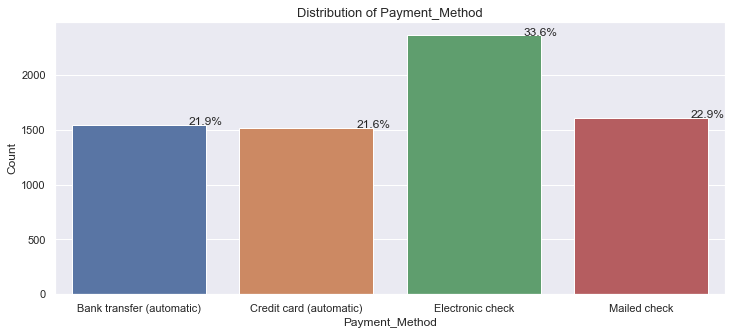

In [888]:
dist_Cat('Payment_Method',12,5)

Infrence:
        
           Created Countplot which showing the count value of each and every payment method
           the plot is showing the the electronuc check has maximum number of payments
           and the credit card is the least used payment method

##### Q10. Please create an appropriate plot to see the relationship between monthly charges and total charges.

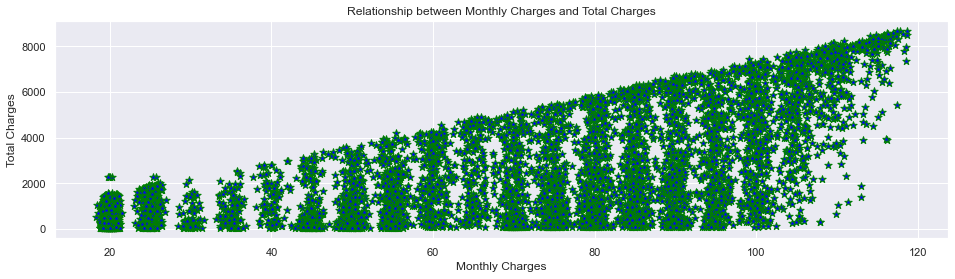

In [889]:
#scatter plot for relationship
plt.figure(figsize=(16,4))
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Relationship between Monthly Charges and Total Charges")
plt.scatter(x=df_churn.Monthly_Charges,y=df_churn.Total_Charges, marker='*',c ="blue",edgecolor ="green",s = 60); 
plt.show()

Infrence

        We can see here the relation between monthly charges and total charges are directly related to each other.
        when monthly charges is increased total charges also increased.